In [10]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.externals import joblib
from keras.models import load_model

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from visualization import plot_ROC_curve

In [3]:
nrows = 500000
features_df = pd.read_csv("../features/feaures_pyAA_all_10ms.csv", nrows=nrows)

# features_df = pd.read_csv("../features/feaures_pyAA_all_10ms.csv")

In [4]:
mini_df = features_df
nfeatures = mini_df.shape[1] - 2
X = mini_df.iloc[:, :nfeatures].as_matrix()
Y = mini_df.IS_LAUGHTER.as_matrix()
y = Y

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
X.shape

(500000, 102)

In [7]:
model_path = "../models/rnn_50k_pyAA_features.h5"
model = load_model(model_path)
# model = joblib.load(model_path)

In [8]:
model

In [9]:
y_pred = model.predict_proba(X.reshape(X.shape[0], -1, 1))

499840/500000 [============================>.] - ETA: 0s

/home/kurbanov/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


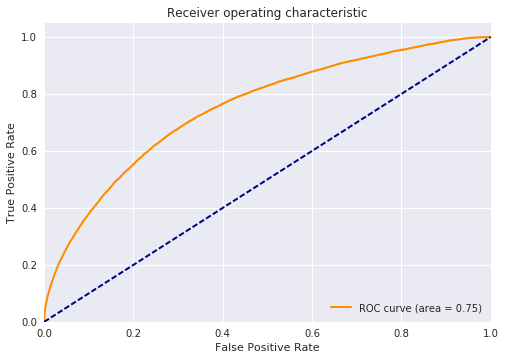

In [11]:
plot_ROC_curve(y_pred[:, 1], y)

In [13]:
# Compute ROC curve and ROC area for each class
# roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

In [14]:
thresholds[tpr >= 0.6][0]

0.024973519